In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

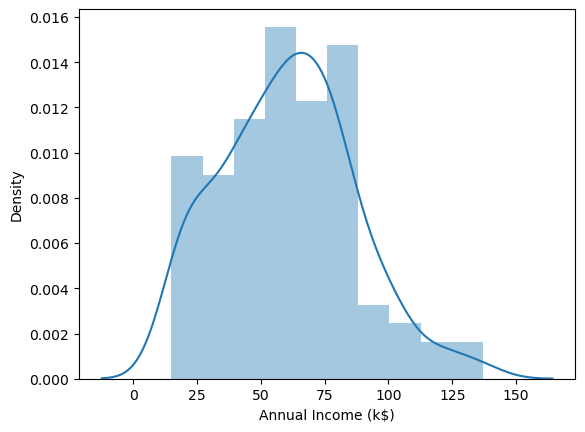

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
#Pretty normal distribution of the annual income 

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

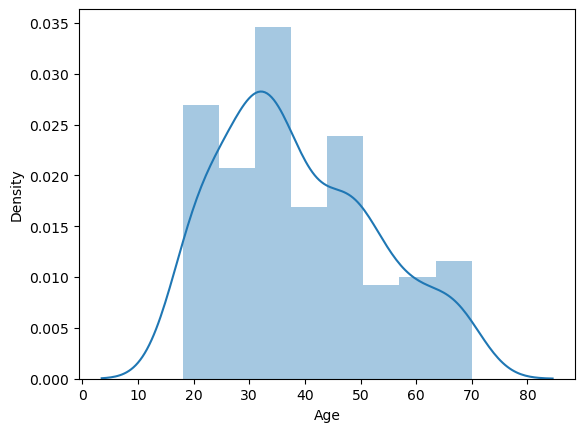

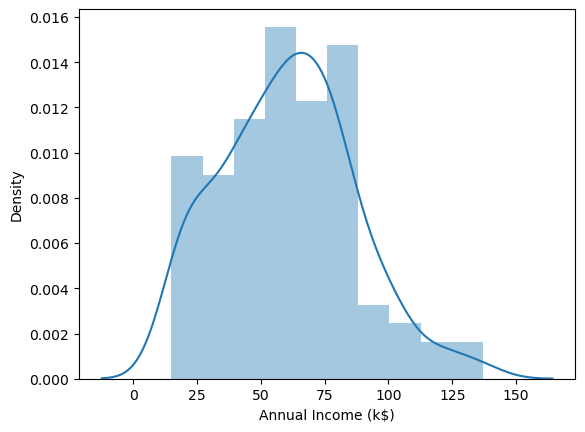

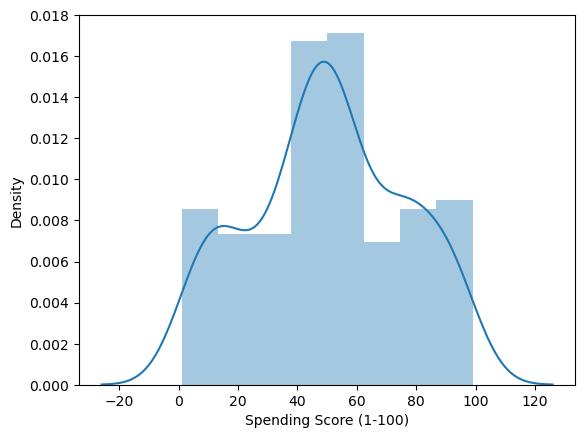

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

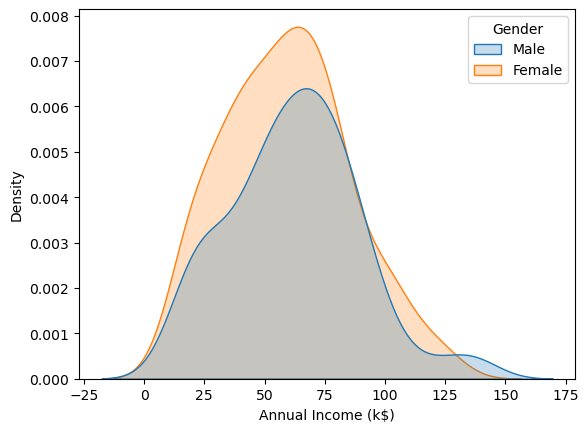

In [9]:
sns.kdeplot(data=df, x='Annual Income (k$)', fill=True, hue='Gender')


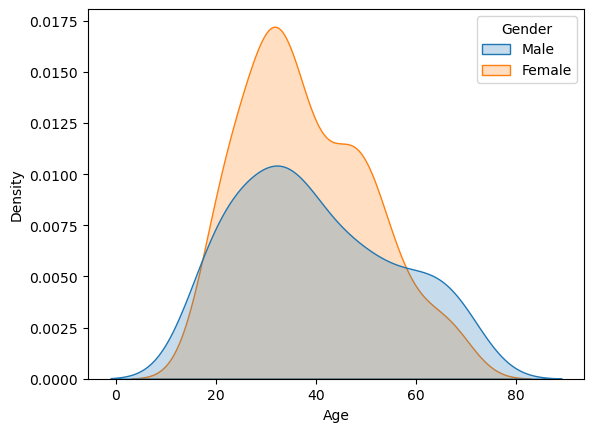

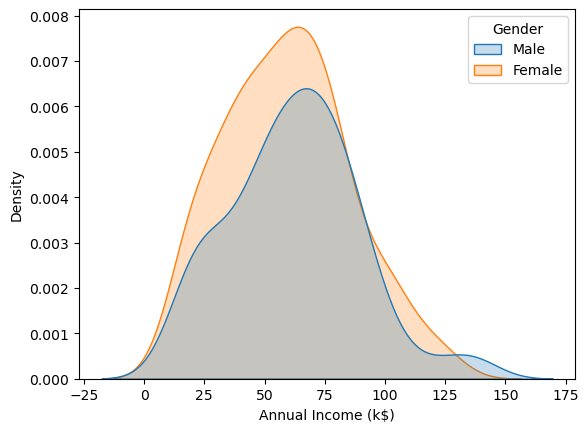

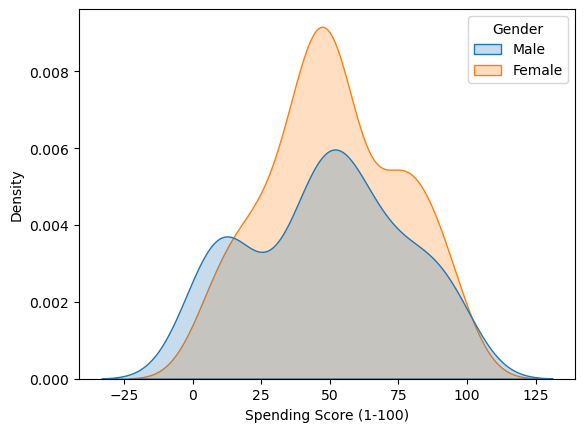

In [10]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, fill=True, hue='Gender')

### Gender-wise Distribution of Key Features

To understand how male and female customers differ in terms of demographics and spending behavior, we plotted Kernel Density Estimates (KDE) for the following features:

- **Age**
- **Annual Income (k$)**
- **Spending Score (1–100)**

These plots help visualize the **distribution of each feature by gender**, highlighting patterns such as:
- Female customers tend to be slightly younger on average.
- Spending score distributions vary across genders.
- Income distribution may differ in shape or spread.

These visual insights help set the stage for clustering by revealing potential segments in the data.


In [11]:
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

 #Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

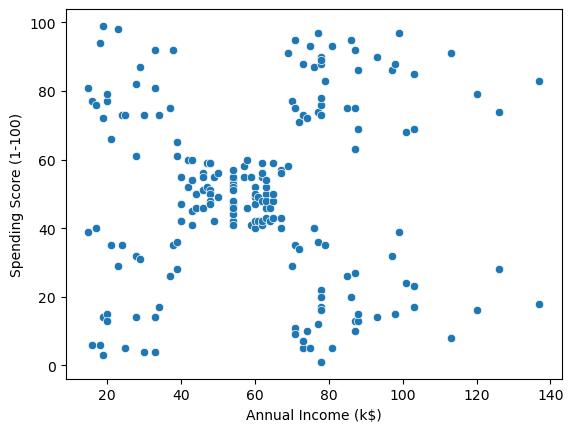

In [12]:
sns.scatterplot(data = df, x='Annual Income (k$)', y = 'Spending Score (1-100)')

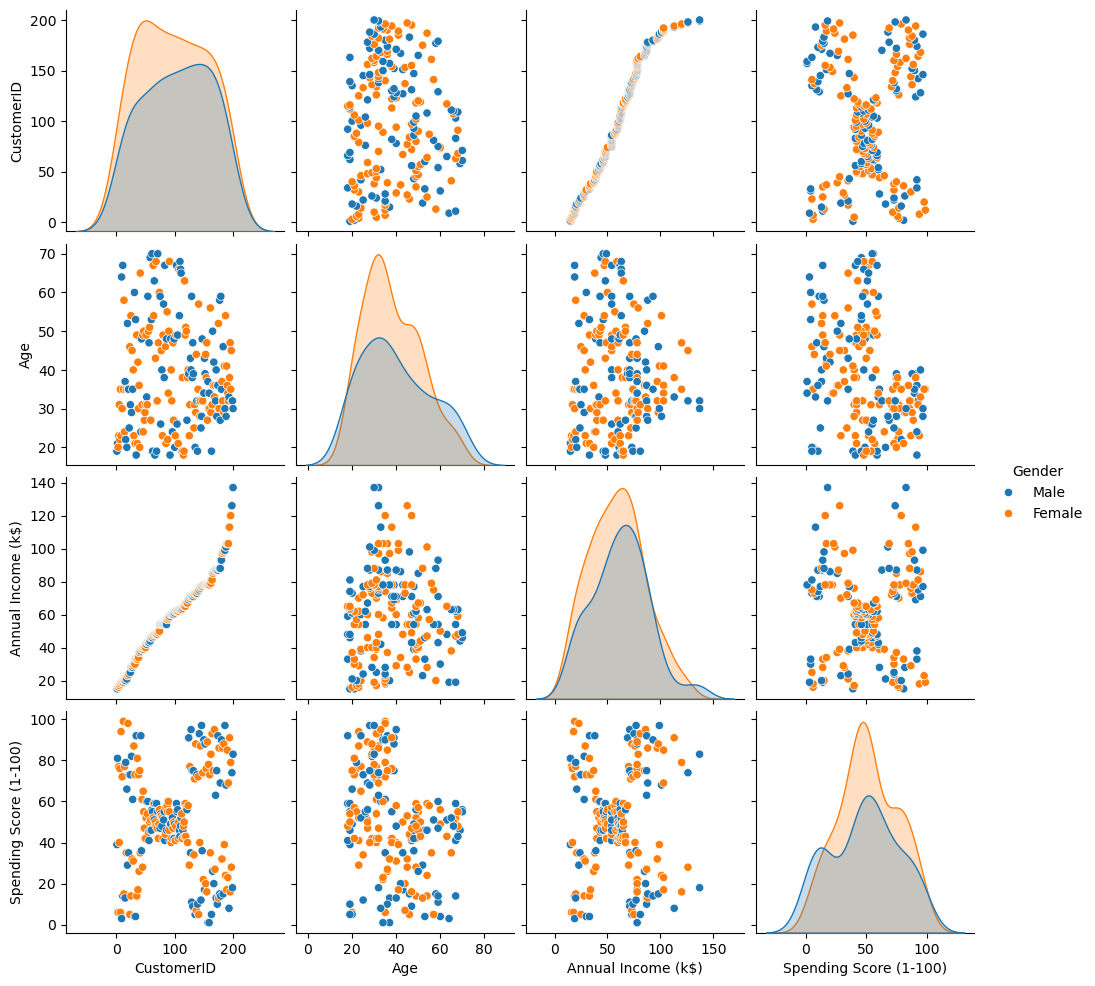

In [13]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df, hue = 'Gender')

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.select_dtypes(include='number').corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

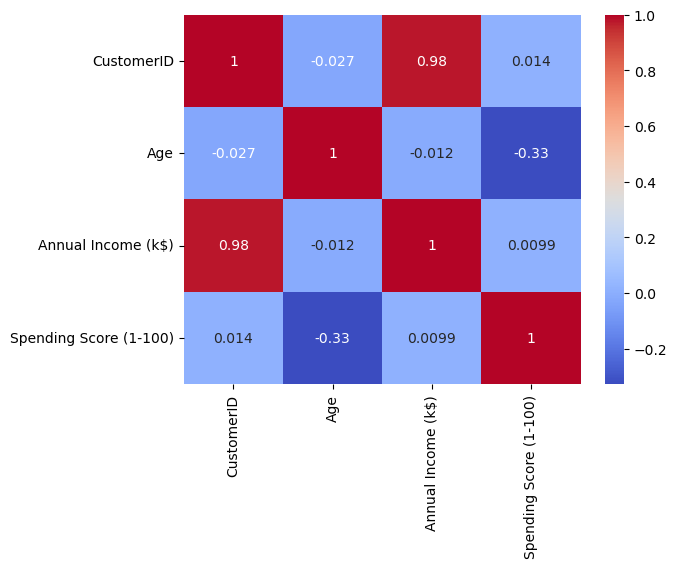

In [17]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap = 'coolwarm')

In [18]:
#Clustering of Univariate, Bivariate and Multivariate

In [19]:
clustering1 = KMeans(n_clusters = 3)

In [20]:
clustering1.fit(df[['Annual Income (k$)']]) 

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [22]:
df['Income clusters'] =  clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [23]:
df['Income clusters'].value_counts()

Income clusters
0    92
1    86
2    22
Name: count, dtype: int64

In [24]:
clustering1.inertia_

25341.28587186322

In [25]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    

In [26]:
intertia_scores

[137277.28,
 49761.73701298701,
 25341.28587186322,
 13844.222098218706,
 8684.330924608816,
 5081.484660267269,
 3976.358363858364,
 2944.0378787878794,
 2173.287445887446,
 1916.6310023310027]

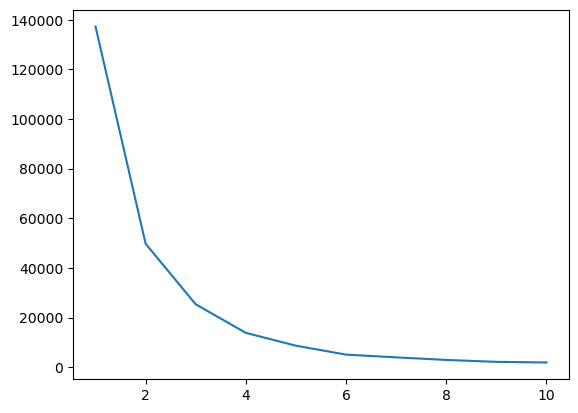

In [27]:

plt.plot(range(1,11),intertia_scores)

In [28]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income clusters'],
      dtype='object')

In [29]:
df.groupby(['Income clusters'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income clusters,,,
0,38.065217,71.804348,49.880435
1,40.023256,36.348837,50.081395
2,37.545455,108.181818,52.000000


# Bivariate Analysis

In [31]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,4


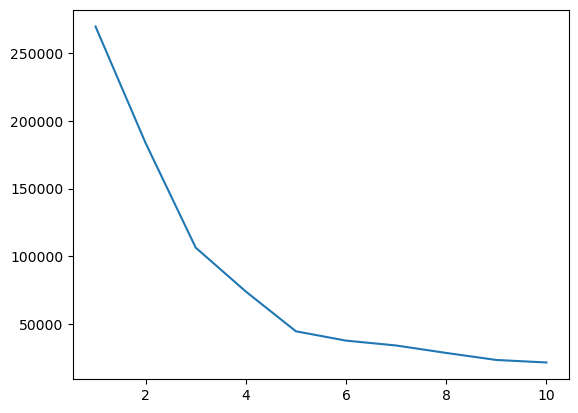

In [32]:

intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [33]:
	
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

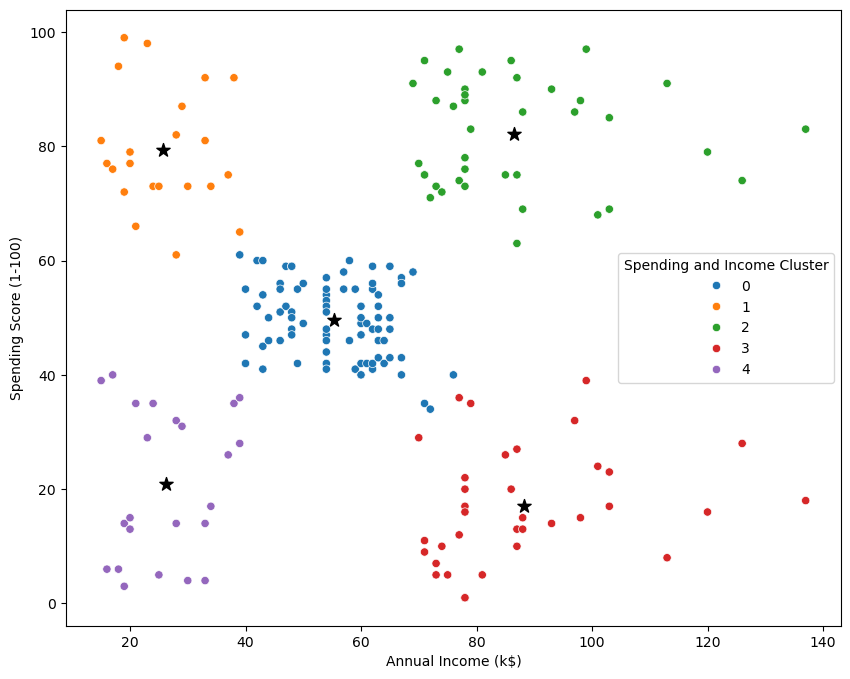

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

### Customer Segmentation Based on Income and Spending Score

The scatter plot below illustrates the segmentation of customers using the KMeans clustering algorithm. Each point represents a customer, plotted based on their **Annual Income (k$)** and **Spending Score (1–100)**. 

- Customers are grouped into five distinct clusters, each represented by a different color.
- The **black stars** indicate the **centroids** (center points) of each cluster.
- This visualization helps identify patterns such as:
  - High-income, high-spending customers (top right)
  - Low-income, low-spending customers (bottom left)
  - High-income, low-spending customers (bottom right)
  - Low-income, high-spending customers (top left)
  - Middle-income, moderate-spending customers (center)

These insights are valuable for developing targeted marketing strategies for each segment based on their purchasing behavior and financial capacity.


In [35]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [36]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [37]:
scale = StandardScaler()

In [38]:
df2 = pd.get_dummies(df,drop_first=True)
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,1,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,1,False
4,5,31,17,40,1,4,False


In [39]:
	
df2.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income clusters', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [40]:
df2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [41]:
df2 = scale.fit_transform(df2)

In [42]:
df2 = pd.DataFrame(scale.fit_transform(df2))
df2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


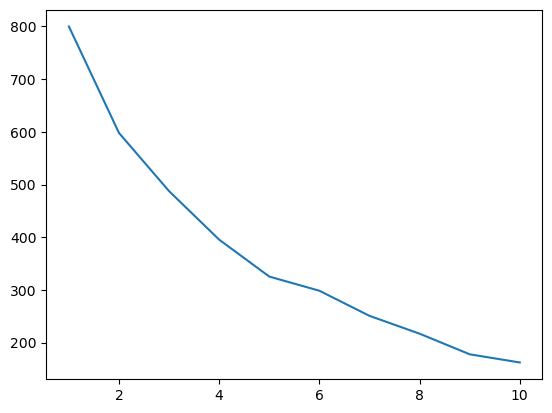

In [43]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df2)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [44]:
df.to_csv('Clustering.csv')

In [45]:
#Kmeans

In [46]:
kmeans_final = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [47]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary['Count'] = df['Cluster'].value_counts().sort_index()
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,46.2,47.7,41.8,89
1,32.5,108.2,82.7,11
2,24.7,29.6,73.7,29
3,40.4,87.0,18.6,38
4,31.8,76.1,77.8,33


In [53]:
df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack().round(2) * 100


Gender,Female,Male
Cluster,,
0,62.0,38.0
1,55.0,45.0
2,52.0,48.0
3,47.0,53.0
4,55.0,45.0


In [48]:
df['Segment Value'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']
df.groupby('Cluster')['Segment Value'].mean().sort_values(ascending=False)


Cluster
1    8920.636364
4    5958.909091
0    2145.752809
2    2120.241379
3    1634.973684
Name: Segment Value, dtype: float64

In [49]:
segment_labels = {
    0: "Low Income, Low Spending",
    1: "High Income, High Spending",
    2: "High Income, Low Spending",
    3: "Balanced Segment",
    4: "Young & High Spending"
}
df['Segment Label'] = df['Cluster'].map(segment_labels)


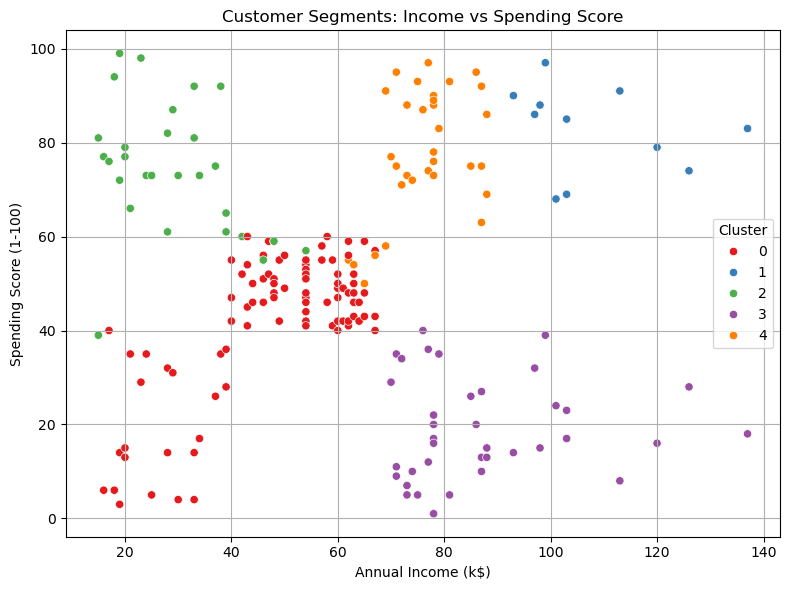

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title("Customer Segments: Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Cluster Visualization: Income vs Spending Score

The plot below presents the final KMeans clustering results using **Annual Income** and **Spending Score** as the primary features. Each point represents an individual customer, color-coded based on their assigned cluster.

This visualization helps clearly differentiate the customer segments identified through KMeans:

- **Top-right region**: High income and high spending — likely premium customers
- **Bottom-left region**: Low income and low spending — low priority for targeting
- **Other regions**: Varying combinations of income and spending behavior

This version of the plot is optimized for presentation and communication, using consistent color coding and a clear layout to convey segmentation outcomes effectively.


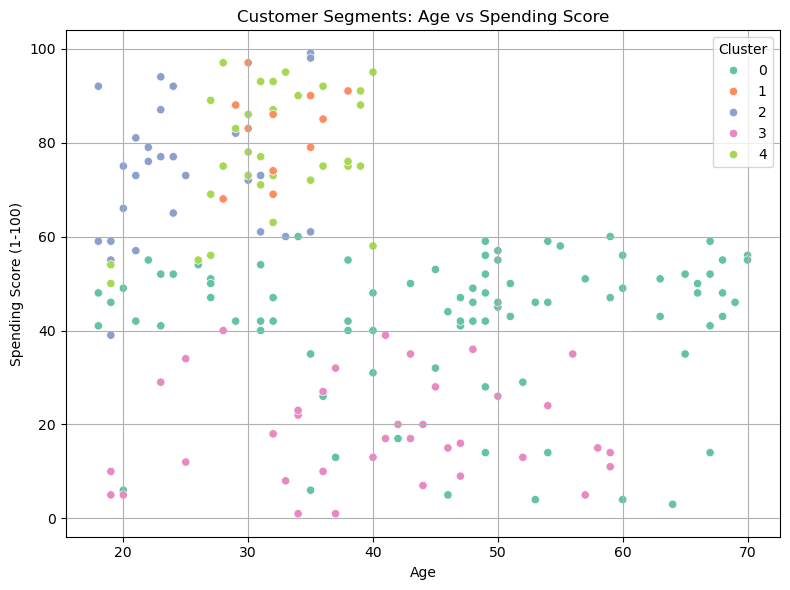

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments: Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


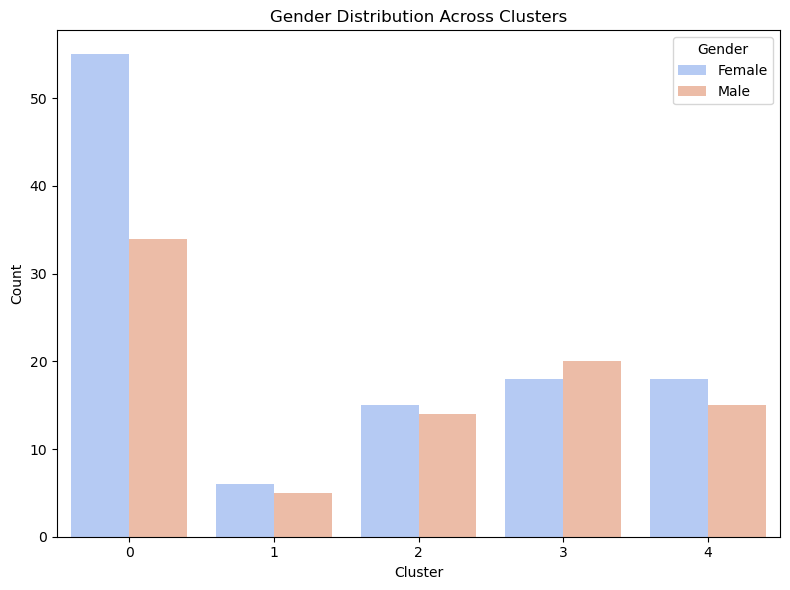

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', hue='Gender', palette='coolwarm')
plt.title("Gender Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Target Cluster Analysis

Primary Target Segment: Cluster 1

- Customers in Cluster 1 have the highest average income (108.2k) and highest spending score (82.7).
- This cluster also has the highest Segment Value, calculated as:
  Segment Value = Annual Income × Spending Score
- Although it's a small group (only 11 customers), they are highly valuable and worth targeting through premium, loyalty-driven marketing strategies.
- Gender-wise, 55% of this cluster are female, suggesting a slight skew toward women. Campaigns can be fine-tuned with product preferences or ad creatives tailored to this segment.

Secondary Target: Cluster 4

- With a good income level (76.1k) and a high spending score (77.8), Cluster 4 represents a larger group of 33 customers.
- 55% of this segment is also female.
- This cluster is ideal for high-conversion seasonal campaigns or limited-time bundle offers.

Additional Observations:

- Cluster 2 (young, low income, but high spending) may respond well to trend-based promotions or student-focused marketing.
- Cluster 0, while the largest group, has average scores — best suited for general campaigns.
- Cluster 3 shows high income but low spending, indicating a need for re-engagement strategies or exploring product-market fit.
